# LATAR BELAKANG  
NYC TLC (New York City Taxi and Limousine Commission) adalah lembaga yang bertanggung jawab untuk mengatur dan mengawasi industri transportasi berbayar di Kota New York. Komisi ini didirikan pada tahun 1971 dan memiliki wewenang untuk mengeluarkan izin, menegakkan peraturan, dan menetapkan kebijakan untuk berbagai layanan transportasi, termasuk taksi, kendaraan berbayar, dan layanan ride-hailing.

Peran utama NYC TLC adalah untuk memastikan keselamatan dan kualitas layanan transportasi yang diberikan kepada masyarakat. Komisi menetapkan standar kualifikasi pengemudi, pemeriksaan kendaraan, dan persyaratan asuransi untuk melindungi penumpang dan mempromosikan sistem transportasi yang dapat diandalkan. TLC juga menetapkan struktur tarif, memantau keluhan pelanggan, dan menegakkan aturan dan peraturan terkait industri ini.

Salah satu aspek ikonik dari NYC TLC adalah pengaturan industri taksi kuning. Komisi mengawasi lisensi dan operasi taksi kuning di kota ini, yang merupakan bagian integral dari sistem transportasi Kota New York. TLC menetapkan aturan untuk tarif taksi, medali taksi (lisensi), kualifikasi pengemudi, dan standar kendaraan.

Dalam beberapa tahun terakhir, NYC TLC juga memainkan peran penting dalam menyesuaikan peraturan untuk menampung layanan transportasi baru, seperti perusahaan ride-hailing berbasis aplikasi seperti Uber, Lyft, dan layanan kendaraan berbayar lainnya. Komisi telah menerapkan aturan dan persyaratan untuk layanan ini untuk memastikan persaingan yang adil, keselamatan penumpang, dan lisensi yang tepat.

Secara keseluruhan, NYC TLC berfungsi sebagai badan pengatur yang mempromosikan pilihan transportasi yang aman dan efisien bagi penduduk dan pengunjung di Kota New York. Tanggung jawabnya meliputi penerbitan lisensi, pengaturan, dan penegakan untuk menjaga jaringan transportasi yang handal dan teratur.

# MASALAH DAN TUJUAN
**Stakeholder:**  
- COO Vendor satu

**Masalah :**  
- Vendor satu memliki jumlah order yang sangat sedikit ketika dibandingkan dengan vendor dua

**Tujuan :**  
- Meningkatkan jumlah order di vendor satu yang memiliki jumlah order yang cukup jauh dari vendor dua

In [708]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [709]:
df_raw = pd.read_csv('NYC TLC Trip Record.csv')
df = df_raw.copy()

C:\Users\Musa\AppData\Local\Temp\ipykernel_17900\1604315338.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('NYC TLC Trip Record.csv')


**DATA CLEANSING**

****DROP ROW & CHANGE MISS DATA-TYPE****     
- mengganti lpep_pickup_datetime menjadi date-time   
- mengganti lpep_dropoff_datetime menjadi date-time   
- mengganti passenger_count float menjadi integer   
- mengganti RatecodeID dari float menjadi integer   
- mengganti payment_type dari float menjadi integer   
- mengganti trip_type dari float menjadi integer

**show 10 zone dengan highest frequent**

drop column dibawah karena analisis yang di lakukan tidak membutuhkan column-column tersebut, perbandingan yang dilakukan terhadap lokasi, order time, payment type, passenger type tidak dibutuhkan column-column seperti toll_amount,tax_amount,ehail_fee,dkk

In [710]:
df.drop(['store_and_fwd_flag', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'], axis=1, inplace=True)

In [711]:
df.dropna(inplace=True)

merubah lpep_pickup_datetime dan lpep_dropoff_datetime dari tipe data object menjadi date time agar bisa diolah untuk analisis

In [712]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

In [713]:
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [714]:
df['passenger_count'] = df['passenger_count'].astype(int)

In [715]:
df['RatecodeID'] = df['RatecodeID'].astype(int)

In [716]:
df['payment_type'] = df['payment_type'].astype(int)


In [717]:
df['trip_type'] = df['trip_type'].astype(int)


hanya mengambil trip distance dibawah 70 karena ada 1 data yang memiliki trip_distance melebihi 1500miles yang mana pasti anomali

In [718]:
df = df[df['trip_distance'] <= 70]


**ADD NEW COLUMN ZONE & DROPZONE**   
**menambahkan column Zone dan Drop_zone dalam rangka agar memudahkan analisis di kemudian hari**

melakukan merging agar PULocationID dapat di konversi menjadi zone, dan nantinya zone digunakan untuk analisis berdasarkan daerah

In [719]:
dfMapCity = pd.read_csv('taxi+_zone_lookup.csv')
dfMapCity.rename({'LocationID' : 'PULocationID'},axis=1,inplace=True)
df = pd.merge(df,dfMapCity[['PULocationID','Zone']],how='inner',on='PULocationID')

dfMapCity = pd.read_csv('taxi+_zone_lookup.csv')
dfMapCity['Drop_zone'] = dfMapCity['Zone']
dfMapCity.rename({'LocationID' : 'DOLocationID'},axis=1,inplace=True)
df = pd.merge(df,dfMapCity[['DOLocationID','Drop_zone']],how='inner',on='DOLocationID')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,payment_type,trip_type,Zone,Drop_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,1,1,Morningside Heights,Lincoln Square West
1,2,2023-01-02 18:56:58,2023-01-02 19:14:50,1,166,143,1,3.16,2,1,Morningside Heights,Lincoln Square West
2,2,2023-01-03 15:28:11,2023-01-03 15:47:47,1,166,143,1,2.55,1,1,Morningside Heights,Lincoln Square West
3,2,2023-01-03 17:37:14,2023-01-03 17:51:35,1,166,143,1,1.96,2,1,Morningside Heights,Lincoln Square West
4,1,2023-01-03 19:03:53,2023-01-03 19:17:50,1,166,143,2,2.10,2,1,Morningside Heights,Lincoln Square West
...,...,...,...,...,...,...,...,...,...,...,...,...
63871,2,2023-01-04 14:06:53,2023-01-04 14:15:41,1,206,206,1,1.40,2,1,Saint George/New Brighton,Saint George/New Brighton
63872,2,2023-01-11 17:18:54,2023-01-11 17:23:38,1,206,206,1,0.99,1,1,Saint George/New Brighton,Saint George/New Brighton
63873,2,2023-01-13 18:54:31,2023-01-13 19:14:38,1,206,187,1,5.52,2,1,Saint George/New Brighton,Port Richmond
63874,2,2023-01-18 14:37:37,2023-01-18 14:59:56,1,206,156,1,5.10,1,1,Saint George/New Brighton,Mariners Harbor


membuat column baru bernama pickup_time agar saya dapat mengetahui order yang ada terjadi ketika rush/standard/overnight, dan menjadikannya kategorikal seperti ini mempermudah untuk analisis kedepan nanti.

In [720]:
# Define the time ranges
rush_hour_start1 = datetime.time(6, 30)
rush_hour_end1 = datetime.time(9, 30)
rush_hour_start2 = datetime.time(16, 0)
rush_hour_end2 = datetime.time(19, 0)

# Define the function to categorize the pickup time
def categorize_pickup_time(row):
    pickup_time = row['lpep_pickup_datetime'].time()

    if rush_hour_start1 <= pickup_time <= rush_hour_end1:
        return 'Rush'
    elif rush_hour_start2 <= pickup_time <= rush_hour_end2:
        return 'EveningRush'
    elif pickup_time >= datetime.time(0, 0) and pickup_time <= datetime.time(5, 0):
        return 'Overnight'
    else:
        return 'Standard'

# Apply the function to create the new column
df['PUType'] = df.apply(categorize_pickup_time, axis=1)


membuat column passenger_type yang mengklasifikasi tipikal penumpang berdasarkan jumlah, tujuannya untuk melihat kedepannya apakah ada pattern-pattern atau adakah insight yang bisa kita ambil berdasarkan jumlah penumpang

In [2]:
df['passenger_type'] = df['passenger_count'].map({1: 'Single', 2: 'Double'}).fillna('Group')

NameError: name 'df' is not defined

****REMOVE ANOMALI DATA****   

**menghapus data-data di passenger_count dan trip_distance yang memiliki value 0/negatif**

In [722]:
df[df['passenger_count'] <= 0].count()
df = df[df['passenger_count'] > 0]



In [723]:
df[df['trip_distance'] <= 0].count()
df = df[df['trip_distance'] > 0]


**melakukan check ada berapa bulan yang relevan dalam data**

In [724]:
df['pickup_month'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.month

# Get unique months
unique_months = df['pickup_month'].unique()

print(unique_months)

[ 1 12  2]


**menemukan insight bahwa ternyata persebaran data yang relevan ada di bulan Januari, karena di bulan februari dan desember hanya ada 3 total data**

In [725]:
# Extract month from datetime column
df['pickup_month'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.month

# Count occurrences of each month
month_counts = df['pickup_month'].value_counts()

print(month_counts)

1     60378
12        2
2         1
Name: pickup_month, dtype: int64


**menghapus bulan Februari dan Desember**

In [726]:
df = df[~df['pickup_month'].isin([12, 2])]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,payment_type,trip_type,Zone,Drop_zone,PUType,passenger_type,pickup_month
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,1,1,Morningside Heights,Lincoln Square West,Overnight,Single,1
1,2,2023-01-02 18:56:58,2023-01-02 19:14:50,1,166,143,1,3.16,2,1,Morningside Heights,Lincoln Square West,EveningRush,Single,1
2,2,2023-01-03 15:28:11,2023-01-03 15:47:47,1,166,143,1,2.55,1,1,Morningside Heights,Lincoln Square West,Standard,Single,1
3,2,2023-01-03 17:37:14,2023-01-03 17:51:35,1,166,143,1,1.96,2,1,Morningside Heights,Lincoln Square West,EveningRush,Single,1
4,1,2023-01-03 19:03:53,2023-01-03 19:17:50,1,166,143,2,2.10,2,1,Morningside Heights,Lincoln Square West,Standard,Double,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63871,2,2023-01-04 14:06:53,2023-01-04 14:15:41,1,206,206,1,1.40,2,1,Saint George/New Brighton,Saint George/New Brighton,Standard,Single,1
63872,2,2023-01-11 17:18:54,2023-01-11 17:23:38,1,206,206,1,0.99,1,1,Saint George/New Brighton,Saint George/New Brighton,EveningRush,Single,1
63873,2,2023-01-13 18:54:31,2023-01-13 19:14:38,1,206,187,1,5.52,2,1,Saint George/New Brighton,Port Richmond,EveningRush,Single,1
63874,2,2023-01-18 14:37:37,2023-01-18 14:59:56,1,206,156,1,5.10,1,1,Saint George/New Brighton,Mariners Harbor,Standard,Single,1


****DATA ANALYSIS****

***Disini kita melakukan analisis dengan cara:***
1. melakukan sorting 5 daerah dengan highest order
2. melakukan check perbandingan order antar Vendor
3. menghitung persentase kedua belah Vendor
4. melakukan check masih adakah wilayah-wilayah yang masih dibawah rata-rata persentase

In [727]:
df[['Zone']].value_counts().describe()

count      184.000000
mean       328.010870
std       1266.735631
min          1.000000
25%          4.750000
50%         11.500000
75%         64.000000
max      12713.000000
dtype: float64

**show 10 zone dengan highest frequent**

dapat dilihat kota dengan highest order ada di east harlem north,south dan forest hills, central harlem. morningside heights. dari 5 data itu kita akan olah dan akan kita lihat adakah insight yang bisa diambil

In [728]:
pd.DataFrame(df[['Zone']].value_counts().head(10)).reset_index()

,Zone,0
0,East Harlem North,12713
1,East Harlem South,8626
2,Forest Hills,3680
3,Central Harlem,3637
4,Morningside Heights,3576
5,Central Park,2831
6,Elmhurst,2791
7,Fort Greene,2079
8,Astoria,1639
9,Washington Heights South,1606


**show value count setiap zone agar terlihat perbandingan antar vendorID nya**

In [729]:
display(pd.DataFrame(df[df['Zone']=='East Harlem North'][['Zone','VendorID']].value_counts().reset_index()))
display(pd.DataFrame(df[df['Zone']=='East Harlem South'][['Zone','VendorID']].value_counts().reset_index()))
display(pd.DataFrame(df[df['Zone']=='Forest Hills'][['Zone','VendorID']].value_counts().reset_index()))
display(pd.DataFrame(df[df['Zone']=='Central Harlem'][['Zone','VendorID']].value_counts().reset_index()))
display(pd.DataFrame(df[df['Zone']=='Morningside Heights'][['Zone','VendorID']].value_counts().reset_index()))





,Zone,VendorID,0
0,East Harlem North,2,10384
1,East Harlem North,1,2329


,Zone,VendorID,0
0,East Harlem South,2,7546
1,East Harlem South,1,1080


,Zone,VendorID,0
0,Forest Hills,2,3602
1,Forest Hills,1,78


,Zone,VendorID,0
0,Central Harlem,2,3280
1,Central Harlem,1,357


,Zone,VendorID,0
0,Morningside Heights,2,3174
1,Morningside Heights,1,402


**Persentase Vendor ID 1 di 5 kota dengan highest frequent**

didapatkan persentase Vendor 1 terhadap Vendor 2 dari 5 kota tersebut yaitu:
East harlem North : 18%
East harlem South : 12%
Forest hills : 2%
Central Harlem : 9%
Morningside heights : 11%

dari 5 data diatas bisa kita tarik persentase keseluruhan vendor 1 pada 5 kota tersebut ada : 10%, maka dari itu insight yang bisa kita ambil adalah masih adanya order yang masih dibawah rata-rata, maka dari itu saran kita adalah memperbanyak armada atau di daerah tersebut sehingga minimal-nya dapat menyentuh rata-rata yaitu 10%

In [730]:
EHN_PERCENTAGE = df[(df['Zone']=='East Harlem North') & (df['VendorID']==1)]['VendorID'].count() / df[df['Zone']=='East Harlem North']['VendorID'].count()
EHS_PERCENTAGE = df[(df['Zone']=='East Harlem South') & (df['VendorID']==1)]['VendorID'].count() / df[df['Zone']=='East Harlem South']['VendorID'].count()
FH_PERCENTAGE = df[(df['Zone']=='Forest Hills') & (df['VendorID']==1)]['VendorID'].count() / df[df['Zone']=='Forest Hills']['VendorID'].count()
CH_PERCENTAGE = df[(df['Zone']=='Central Harlem') & (df['VendorID']==1)]['VendorID'].count() / df[df['Zone']=='Central Harlem']['VendorID'].count()
MH_PERCENTAGE = df[(df['Zone']=='Morningside Heights') & (df['VendorID']==1)]['VendorID'].count() / df[df['Zone']=='Morningside Heights']['VendorID'].count()

print(EHN_PERCENTAGE*100)
print(EHS_PERCENTAGE*100)
print(FH_PERCENTAGE*100)
print(CH_PERCENTAGE*100)
print(MH_PERCENTAGE*100)

18.319830095178162
12.520287502898213
2.119565217391304
9.815782238108332
11.241610738255034


**Mencari rata-rata persentase VendorID 1 di 5 kota tersebut**

In [731]:
print((EHN_PERCENTAGE+EHS_PERCENTAGE+FH_PERCENTAGE+CH_PERCENTAGE+MH_PERCENTAGE)/5)

0.1080341515836621


**show 10 zone dengan lowest frequent**

melakukan hal yang sama seperti metode sebelumnya hanya saja disini kita melakukannya dengan urutan terendah, kita dapat melihat bahwa masih banyak kota-kota yang belom tersentuh oleh vendor 1, maka dari itu rekomendasi yang kita lakukan adalah mulai masuknya armada-armada ke daerah tersebut

In [732]:
pd.DataFrame(df[['Zone']].value_counts().tail(10))

,0
Zone,
Breezy Point/Fort Tilden/Riis Beach,1
Pelham Bay,1
Hammels/Arverne,1
Oakland Gardens,1
Westerleigh,1
Midtown Center,1
Howard Beach,1
Dyker Heights,1
West Brighton,1


In [733]:
display(pd.DataFrame(df[df['Zone']=='Dyker Heights'][['Zone','VendorID']].value_counts().reset_index()))
display(pd.DataFrame(df[df['Zone']=='Pelham Bay'][['Zone','VendorID']].value_counts().reset_index()))
display(pd.DataFrame(df[df['Zone']=='Greenwich Village South'][['Zone','VendorID']].value_counts().reset_index()))
display(pd.DataFrame(df[df['Zone']=='Oakland Gardens'][['Zone','VendorID']].value_counts().reset_index()))
display(pd.DataFrame(df[df['Zone']=='Ocean Hill'][['Zone','VendorID']].value_counts().reset_index()))





,Zone,VendorID,0
0,Dyker Heights,2,1


,Zone,VendorID,0
0,Pelham Bay,2,1


,Zone,VendorID,0
0,Greenwich Village South,2,1


,Zone,VendorID,0
0,Oakland Gardens,2,1


,Zone,VendorID,0
0,Ocean Hill,2,4
1,Ocean Hill,1,1


****RESET ACAK****

****RESET 1****

disini saya mencoba melakukan analisa terkait passenger_type, tujuannya melihat apakah ada kecenderungan tertentu passenger_type terhadap vendor. misalnya apakah penumpang yang berdua cenderung lebih suka naik taxi dari vendor 1, atau penumpang group lebih suka memilih vendor 2. namun setelah dilakukan analisa ternyata tidak ada perbedaan. pattern yang didapatkan antar kedua vendor sangat mirip

In [734]:
passenger_vendor_counts = df.groupby('VendorID')['passenger_type'].value_counts()
passenger_vendor_counts

VendorID  passenger_type
1         Single             6396
          Double              825
          Group               206
2         Single            44988
          Double             4108
          Group              3855
Name: passenger_type, dtype: int64

In [736]:
passenger_counts = df[df['VendorID'] == 1]['passenger_type'].value_counts()
total_count = passenger_counts.sum()

percentage_single = (passenger_counts['Single'] / total_count) * 100
percentage_double = (passenger_counts['Double'] / total_count) * 100
percentage_group = (passenger_counts['Group'] / total_count) * 100

print("Percentage of Single passengers: {:.2f}%".format(percentage_single))
print("Percentage of Double passengers: {:.2f}%".format(percentage_double))
print("Percentage of Group passengers: {:.2f}%".format(percentage_group))


Percentage of Single passengers: 86.12%
Percentage of Double passengers: 11.11%
Percentage of Group passengers: 2.77%


In [737]:
passenger_counts_dua = df[df['VendorID'] == 2]['passenger_type'].value_counts()
total_count_dua = passenger_counts_dua.sum()

percentage_single_dua = (passenger_counts_dua['Single'] / total_count_dua) * 100
percentage_double_dua = (passenger_counts_dua['Double'] / total_count_dua) * 100
percentage_group_dua = (passenger_counts_dua['Group'] / total_count_dua) * 100

print("Percentage of Single passengers for VendorID = 2: {:.2f}%".format(percentage_single_dua))
print("Percentage of Double passengers for VendorID = 2: {:.2f}%".format(percentage_double_dua))
print("Percentage of Group passengers for VendorID = 2: {:.2f}%".format(percentage_group_dua))


Percentage of Single passengers for VendorID = 2: 84.96%
Percentage of Double passengers for VendorID = 2: 7.76%
Percentage of Group passengers for VendorID = 2: 7.28%


****RESET 2****

disini yang saya lakukan adalah mencoba melakukan analisa terkait payment_type terhadap vendor. dengan tujuan kembali melihat pattern atau adakah kecenderungan payment_type terhadap vendor, namun disini kembali yang kita temukan adalah keduanya memiliki pola yang sama dan sangat mirip

In [738]:
# Group the data by VendorID and payment_type and count the number of occurrences
vendor_payment_counts = df.groupby(['VendorID', 'payment_type']).size()

# Reshape the data to have VendorID as columns and payment_type as rows
vendor_payment_comparison = vendor_payment_counts.unstack()

# Display the comparison of numbers in VendorID by payment_type
print(vendor_payment_comparison)


payment_type      1      2    3   4
VendorID                           
1              4636   2624  139  28
2             33600  19147  162  42


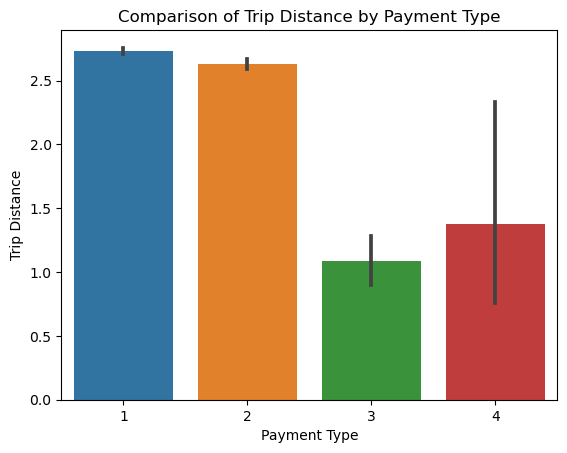

In [739]:
#Create a bar plot
sns.barplot(x='payment_type', y='trip_distance', data=df)

# Add labels and title
plt.xlabel('Payment Type')
plt.ylabel('Trip Distance')
plt.title('Comparison of Trip Distance by Payment Type')

# Display the plot
plt.show()

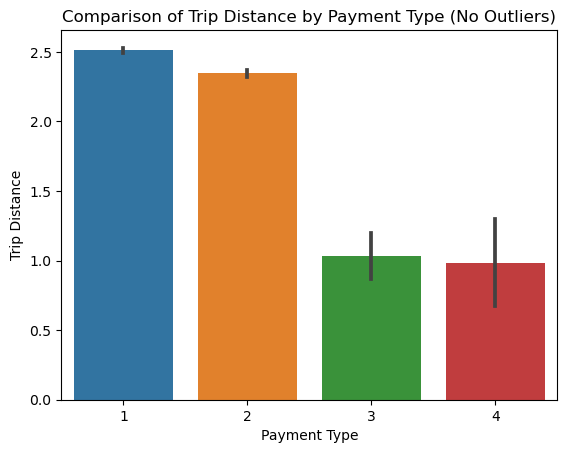

In [740]:
# Calculate the z-scores for trip_distance
z_scores = stats.zscore(df['trip_distance'])

# Define a threshold value for outlier detection
threshold = 3

# Create a boolean mask to identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove outliers from the dataframe
df_no_outliers = df[~outliers]

# Create a bar plot without outliers
sns.barplot(x='payment_type', y='trip_distance', data=df_no_outliers)

# Add labels and title
plt.xlabel('Payment Type')
plt.ylabel('Trip Distance')
plt.title('Comparison of Trip Distance by Payment Type (No Outliers)')

# Display the plot
plt.show()


In [741]:
# Filter the data for VendorID = 1
vendor_1_data = df[df['VendorID'] == 1]

# Calculate the payment type distribution
payment_type_distribution = vendor_1_data['payment_type'].value_counts()

# Calculate the percentage of each payment type
payment_type_percentage = payment_type_distribution / payment_type_distribution.sum() * 100

# Print the payment type distribution and percentage
print("Payment Type Distribution for VendorID = 1:")
print(payment_type_distribution)
print("\nPayment Type Percentage for VendorID = 1:")
print(payment_type_percentage)


Payment Type Distribution for VendorID = 1:
1    4636
2    2624
3     139
4      28
Name: payment_type, dtype: int64

Payment Type Percentage for VendorID = 1:
1    62.420897
2    35.330551
3     1.871550
4     0.377003
Name: payment_type, dtype: float64


In [742]:
# Filter the data for VendorID = 2
vendor_2_data = df[df['VendorID'] == 2]

# Calculate the payment type distribution
payment_type_distribution_dua = vendor_2_data['payment_type'].value_counts()

# Calculate the percentage of each payment type
payment_type_percentage_dua = payment_type_distribution_dua / payment_type_distribution_dua.sum() * 100

# Print the payment type distribution and percentage
print("Payment Type Distribution for VendorID = 2:")
print(payment_type_distribution_dua)
print("\nPayment Type Percentage for VendorID = 2:")
print(payment_type_percentage_dua)


Payment Type Distribution for VendorID = 2:
1    33600
2    19147
3      162
4       42
Name: payment_type, dtype: int64

Payment Type Percentage for VendorID = 2:
1    63.454892
2    36.159846
3     0.305943
4     0.079319
Name: payment_type, dtype: float64


****RESET 3****

In [744]:
# Calculate the value counts of PUType and VendorID
counts = df.groupby(['PUType', 'VendorID']).size().reset_index(name='Count')

# Pivot the table to have PUType as columns and VendorID as index
pivot_table = counts.pivot(index='VendorID', columns='PUType', values='Count')

# Print the pivot table
print(pivot_table)


PUType    EveningRush  Overnight  Rush  Standard
VendorID                                        
1                1664        329  1069      4365
2               12612       2787  6019     31533


****RESET 4****

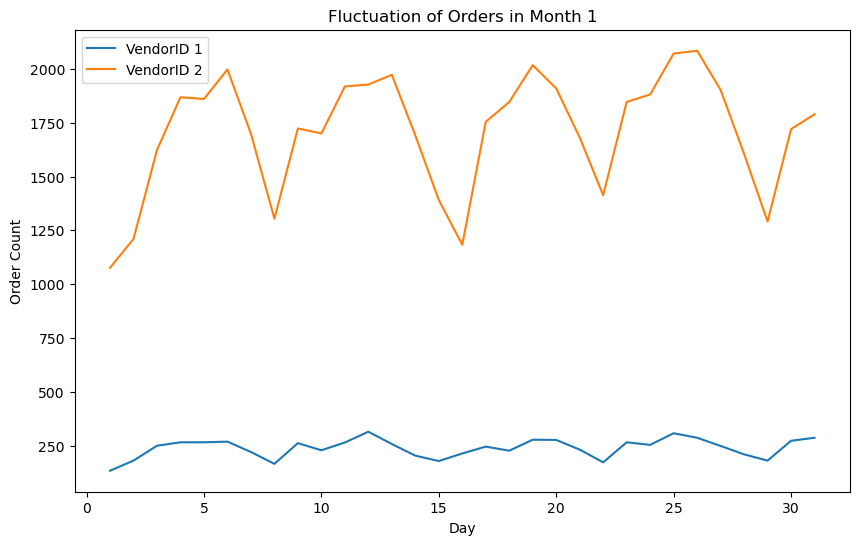

In [745]:
df_month1_vendor1 = df[(df['lpep_pickup_datetime'].dt.month == 1) & (df['VendorID'] == 1)]
df_month1_vendor2 = df[(df['lpep_pickup_datetime'].dt.month == 1) & (df['VendorID'] == 2)]

# Count the number of orders per day for VendorID 1
daily_order_counts_vendor1 = df_month1_vendor1['lpep_pickup_datetime'].dt.day.value_counts().sort_index()

# Count the number of orders per day for VendorID 2
daily_order_counts_vendor2 = df_month1_vendor2['lpep_pickup_datetime'].dt.day.value_counts().sort_index()

# Plotting the daily order counts for both VendorID 1 and VendorID 2
plt.figure(figsize=(10, 6))
plt.plot(daily_order_counts_vendor1.index, daily_order_counts_vendor1.values, label='VendorID 1')
plt.plot(daily_order_counts_vendor2.index, daily_order_counts_vendor2.values, label='VendorID 2')
plt.xlabel('Day')
plt.ylabel('Order Count')
plt.title('Fluctuation of Orders in Month 1')
plt.legend()
plt.show()


Melakukan analisa vendor terhadap PUType/ pickup time, untuk melihat kecenderungan apakah taxi yang mana yang biasanya lebih laku ketika rush/overnight/standard. ternyata antar kedua vendor memiliki pattern atau pola yang sama

In [747]:
order_counts = df.groupby(['VendorID', 'PUType']).size().unstack()
print(order_counts)


PUType    EveningRush  Overnight  Rush  Standard
VendorID                                        
1                1664        329  1069      4365
2               12612       2787  6019     31533


****RESET 5****

Ini menarik disini saya menemukan adanya kota-kota yang justru disana ada order kepada Vendor 1 tetapi tidak ada sama sekali/atau tidak pernah ada order Vendor 2. yang mana disini jumlah order antar Vendor 1 dan 2 sangat timpang Vendor 2 merupakan vendor yang lebih banyak, ini hal yang perlu kita highlight ternyata masih ada wilayah-wilayah yang justru disana vendor 1 lebih dipakai

In [749]:
vendor1_zones = set(df[df['VendorID'] == 1]['Zone'])
vendor2_zones = set(df[df['VendorID'] == 2]['Zone'])

zones_with_vendor2_only = vendor2_zones - vendor1_zones

if zones_with_vendor2_only:
    print("There are zones with VendorID 2 but no VendorID 1:")
    for zone in zones_with_vendor2_only:
        print(zone)
else:
    print("There are no zones with VendorID 2 but no VendorID 1.")


There are zones with VendorID 2 but no VendorID 1:
Cambria Heights
Woodlawn/Wakefield
Manhattan Valley
Riverdale/North Riverdale/Fieldston
Briarwood/Jamaica Hills
Long Island City/Queens Plaza
Midtown Center
University Heights/Morris Heights
JFK Airport
Richmond Hill
Woodhaven
Randalls Island
Jamaica Estates
Cypress Hills
Sunset Park East
Auburndale
LaGuardia Airport
Saint Albans
Borough Park
Yorkville East
Bay Ridge
Bellerose
Eastchester
Roosevelt Island
Fresh Meadows
Willets Point
South Jamaica
Glendale
Dyker Heights
Bloomfield/Emerson Hill
Allerton/Pelham Gardens
Hammels/Arverne
Columbia Street
Bayside
Greenwich Village South
Bronxdale
Saint Michaels Cemetery/Woodside
Middle Village
Highbridge
Schuylerville/Edgewater Park
Hillcrest/Pomonok
Rosedale
Baisley Park
Springfield Gardens South
Pelham Bay
West Brighton
Hollis
Murray Hill-Queens
Breezy Point/Fort Tilden/Riis Beach
Oakland Gardens
Whitestone
Stapleton
Saint George/New Brighton


In [750]:
vendor1_zones = set(df[df['VendorID'] == 1]['Zone'])
vendor2_zones = set(df[df['VendorID'] == 2]['Zone'])

zones_with_vendor1_only = vendor1_zones - vendor2_zones

if zones_with_vendor1_only:
    print("There are zones with VendorID 1 but no VendorID 2:")
    for zone in zones_with_vendor1_only:
        print(zone)
else:
    print("There are no zones with VendorID 1 but no VendorID 2.")


There are zones with VendorID 1 but no VendorID 2:
Glen Oaks
Howard Beach
Westerleigh
Madison


In [751]:
zones = ["Glen Oaks", "Howard Beach", "Westerleigh", "Madison"]
zone_frequency = df[df['Zone'].isin(zones)]['Zone'].value_counts()

for zone, count in zone_frequency.items():
    print(f"Zone: {zone}, Frequency: {count}")


Zone: Madison, Frequency: 4
Zone: Glen Oaks, Frequency: 2
Zone: Howard Beach, Frequency: 1
Zone: Westerleigh, Frequency: 1


In [752]:
zones = ['Glen Oaks', 'Howard Beach', 'Westerleigh', 'Madison']
filtered_df = df[df['Zone'].isin(zones)]
filtered_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,payment_type,trip_type,Zone,Drop_zone,PUType,passenger_type,pickup_month
52205,1,2023-01-12 06:25:00,2023-01-12 06:26:41,1,124,180,1,0.3,3,1,Howard Beach,Ozone Park,Standard,Single,1
61679,1,2023-01-02 22:12:45,2023-01-02 22:20:35,1,149,210,1,1.5,2,1,Madison,Sheepshead Bay,Standard,Single,1
61680,1,2023-01-05 21:38:11,2023-01-05 21:44:46,1,149,210,1,1.0,2,1,Madison,Sheepshead Bay,Standard,Single,1
61681,1,2023-01-14 09:00:17,2023-01-14 09:19:44,1,149,210,1,1.3,2,1,Madison,Sheepshead Bay,Rush,Single,1
61683,1,2023-01-24 13:59:29,2023-01-24 14:20:12,1,149,210,1,1.3,2,1,Madison,Sheepshead Bay,Standard,Single,1
63616,1,2023-01-01 03:06:11,2023-01-01 03:06:41,5,101,101,1,1.3,3,2,Glen Oaks,Glen Oaks,Overnight,Single,1
63617,1,2023-01-01 03:07:26,2023-01-01 03:07:50,5,101,101,1,1.3,1,2,Glen Oaks,Glen Oaks,Overnight,Single,1
63863,1,2023-01-01 03:00:27,2023-01-01 03:00:54,3,251,251,1,4.9,2,1,Westerleigh,Westerleigh,Overnight,Single,1


In [754]:
df.to_csv('NYC TLC Trip Record_final.csv')

## KESIMPULAN

- Di beberapa kota yang traffic nya tinggi Vendor 1 masih kurang maksimal, karena masih adanya frekuensi order yang dibawah rata-rata
- Di kota yang sangat minim order, masih banyak kota yang bahkan Vendor 1 belum pernah ada order didaerah tersebut
- tipe-tipe pembayaran tidak memiliki pengaruh terhadap kecenderungan penumpang memilih taxi
- tipe-tipe penumpah(group/single/double) tidak memiliki pengaruh terhadap kecenderungan penumpang memilih taxi
- jam pikcup penumpang tidak memiliki kecenderungan terhadap penumpang memilih taxi yang mana
- adanya kota-kota yang sudah di pegang oleh vendor 1 bahkan belom masuk vendor 2

## REKOMENDASI  

- di kota-kota dengan traffic tinggi Vendor 1 harus memaksimalkan perbanyakan armada atau melakukan advertisment
- vendor 1 juga harus mulai masuk ke kota-kota yang tadinya belum pernah dijamah dan dikunjungi karena mungkin disana ada potensial order